In [2]:
!pip install numerapi

In [ ]:
import numerapi
# some API calls do not require logging in
napi = numerapi.NumerAPI(verbosity="info")
# download current dataset
# napi.download_current_dataset(unzip=True)
# get competitions
all_competitions = napi.get_competitions()
# get current leaderboard
leaderboard = napi.get_leaderboard()
# check if a new round has started
if napi.check_new_round():
    print("new round has started within the last 24hours!")
else:
    print("no new round within the last 24 hours")

# provide api tokens
example_public_id = "somepublicid"
example_secret_key = "somesecretkey"
napi = NumerAPI(example_public_id, example_secret_key)

# upload predictions
submission_id = napi.upload_predictions("preds.csv", tournament=1)
# check submission status
napi.submission_status()
# increase your stake by 1.2 NMR
napi.stake_increase(1.2)

# convert results to a pandas dataframe
import pandas as pd
df = pd.io.json.json_normalize(napi.daily_user_performances("uuazed"), sep="-")

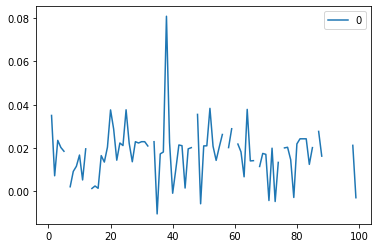

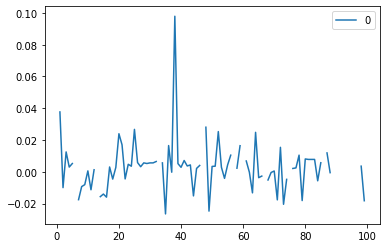

In [23]:
import time
import numerapi
import matplotlib.pyplot as plt

# provide api tokens
#example_public_id = "somepublicid"
#example_secret_key = "somesecretkey"
#napi = NumerAPI(example_public_id, example_secret_key)

round = 212
api = numerapi.NumerAPI()

LB = api.get_leaderboard(limit=100)  # TOP100ユーザー
users = [LB[i]["username"] for i in range(len(LB))]

submission_corr = []
mmc = []

for user in users:
    sub = api.daily_submissions_performances(username=user)
    sub_round = [sub[i] for i in range(len(sub)) if sub[i]["roundNumber"]==round]
    submission_corr.append(sub_round[0]["correlation"])
    mmc.append(sub_round[0]["mmc"])
    time.sleep(0.5)
    
    
    
import pandas as pd
#print(submission_corr)
#print(mmc)

df1 = pd.DataFrame(submission_corr)
#print (df1)
df2 = pd.DataFrame(mmc)
#print (df2)

df1.plot()
df2.plot()
#plt.hist(submission_corr)
#plt.hist(mmc)